In [1]:
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
df_lgd = pd.read_csv("LGD.csv").dropna()
df_lgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ScoreBuro            468 non-null    float64
 1   PorcZonaResidencial  468 non-null    float64
 2   Garantia             468 non-null    int64  
 3   Apalancamiento       468 non-null    float64
 4   MaximoAtraso         468 non-null    float64
 5   Ingreso              468 non-null    int64  
 6   ScoreDemografico     468 non-null    float64
 7   LGD                  468 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 32.9 KB


In [3]:
print(df_lgd.shape)

(468, 8)


In [4]:
df_lgd.head()

,ScoreBuro,PorcZonaResidencial,Garantia,Apalancamiento,MaximoAtraso,Ingreso,ScoreDemografico,LGD
0,0.09744,0.0,1,0.499,61.4,279,11.41,8.00
1,0.08014,0.0,1,0.499,41.5,279,8.77,8.40
2,0.17505,0.0,1,0.499,30.2,279,10.13,9.88
3,0.02763,75.0,1,0.428,21.8,252,4.32,12.32
4,0.03359,75.0,1,0.428,15.8,252,1.98,13.96


In [5]:
df_lgd.isnull().sum()

ScoreBuro              0
PorcZonaResidencial    0
Garantia               0
Apalancamiento         0
MaximoAtraso           0
Ingreso                0
ScoreDemografico       0
LGD                    0
dtype: int64

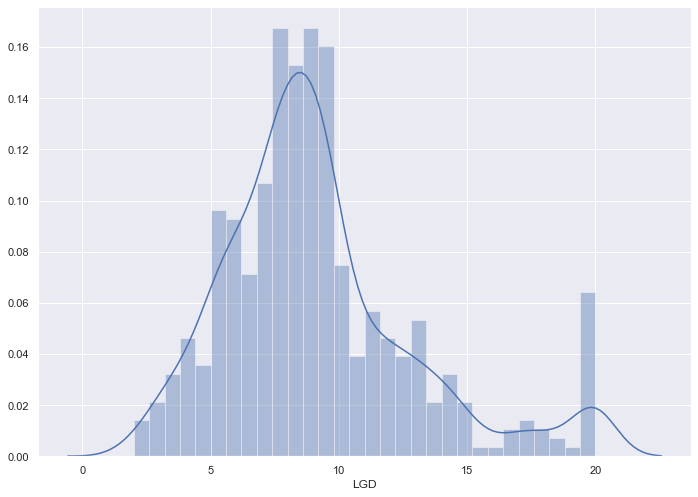

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_lgd['LGD'], bins=30)
plt.show()

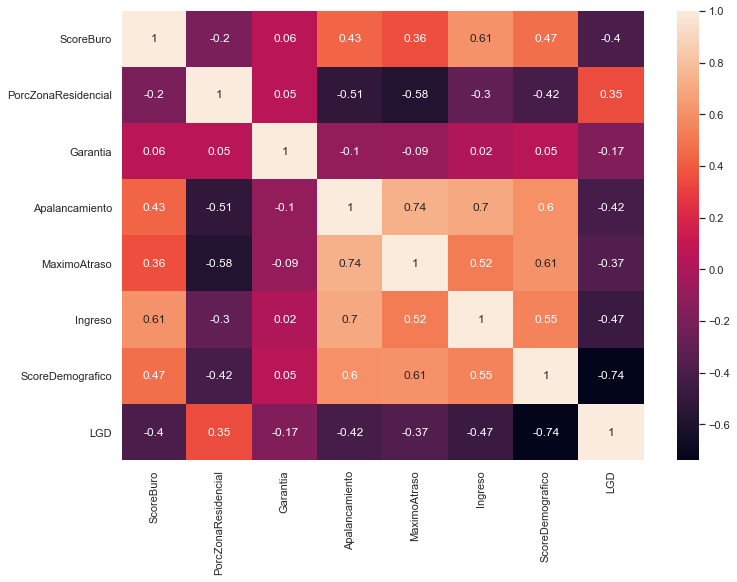

In [10]:
correlation_matrix = df_lgd.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

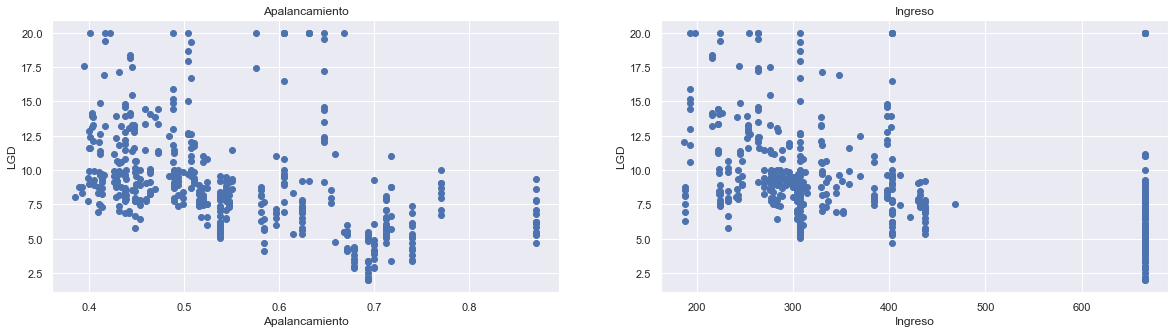

In [11]:
plt.figure(figsize=(20, 5))

features = ['Apalancamiento', 'Ingreso']
target = df_lgd['LGD']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_lgd[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('LGD')

In [12]:
X = df_lgd.iloc[:,:-1]
y = df_lgd.iloc[:,-1]
X.head()

,ScoreBuro,PorcZonaResidencial,Garantia,Apalancamiento,MaximoAtraso,Ingreso,ScoreDemografico
0,0.09744,0.0,1,0.499,61.4,279,11.41
1,0.08014,0.0,1,0.499,41.5,279,8.77
2,0.17505,0.0,1,0.499,30.2,279,10.13
3,0.02763,75.0,1,0.428,21.8,252,4.32
4,0.03359,75.0,1,0.428,15.8,252,1.98


In [13]:
y.head()

0     8.00
1     8.40
2     9.88
3    12.32
4    13.96
Name: LGD, dtype: float64

# Exercise
- Create a test(0.3) and train split.
- fit a linear model
- predict the price for houses in test split.
- Calculate the R2 and MAE in test and train.

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

,ScoreBuro,PorcZonaResidencial,Garantia,Apalancamiento,MaximoAtraso,Ingreso,ScoreDemografico
343,17.86670,0.0,1,0.671,100.0,666,21.78
254,0.03502,80.0,1,0.411,27.9,245,3.33
170,0.22969,0.0,1,0.489,52.5,277,10.97
200,0.52058,0.0,0,0.507,76.5,307,9.54
429,3.16360,0.0,1,0.655,48.2,666,14.13


# Hipothesis testing 

In [98]:
import statsmodels.api as sm

In [99]:
X_train2 = sm.add_constant(X_train)

C:\Users\Eduardo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [100]:
X_train2.head()

,const,ScoreBuro,PorcZonaResidencial,Garantia,Apalancamiento,MaximoAtraso,Ingreso,ScoreDemografico
326,1.0,3.67822,0.0,1,0.770,96.2,666,10.19
221,1.0,0.61154,20.0,1,0.647,86.9,264,5.12
114,1.0,1.65660,0.0,1,0.871,97.3,403,14.10
359,1.0,8.71675,0.0,1,0.693,98.8,666,17.12
434,1.0,0.02729,0.0,1,0.469,61.1,242,4.03


In [101]:
model = sm.OLS(y_train, X_train2)
model2 = model.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    LGD   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     64.57
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           1.95e-57
Time:                        17:44:56   Log-Likelihood:                -746.81
No. Observations:                 327   AIC:                             1510.
Df Residuals:                     319   BIC:                             1540.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.9783    